In [85]:
import requests
import re
from bs4 import BeautifulSoup
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

# Scraping 

(pickled novel should already be in directory as dict_18_ulysses.pkl)

In [86]:
# html = requests.get('https://www.gutenberg.org/files/4300/4300-h/4300-h.htm#chap15')

# soup = BeautifulSoup(html.content, 'html.parser')

# utext = ''
# for i in soup.findAll('div', {'class':'chapter'}):
#     utext += i.text

# cleaned = re.sub('[\n\r\-\—\*\\xa0]', ' ', utext)
# cleaned = re.sub('\s+', ' ', cleaned)

# chapters = re.split('\[\s\d+\s\]', cleaned)

# n = 1
# for i in chapters:
#     print(i[:50], n)
#     n+= 1

# ulysses = dict()
# chapter_num = 1
# for i in chapters[1:]:
#     ulysses[chapter_num] = i
#     chapter_num += 1

In [87]:
# pickle.dump(ulysses, open("dict_18_ulysses.pkl", "wb"))

In [88]:
# pickle.dump(cleaned, open("clean_ulysses.pkl", "wb"))

# Load novel from pickle

In [101]:
# ulyssesp is a dict:   {keys = chapter numbers(int 1-18): values = text(untokenized string)}
ulyssesp = pickle.load(open("dict_18_ulysses.pkl", "rb"))

titles = pickle.load(open("ulysses_chtitles.pkl", "rb"))

In [102]:
# titles = 'Telemachus,Nestor,Proteus,Calypso,Lotus Eaters,Hades,Aeolus,Lestrygonians,Scylla and Charybdis,Wandering Rocks,Sirens,Cyclops,Nausicaa,Oxen of the Sun,Circe,Eumaeus,Ithaca,Penelope'
# titles = titles.split(',')
# pickle.dump(titles, open("ulysses_chtitles.pkl", "wb"))

In [103]:
# first 1000 characters of chapter 1
ulyssesp[1][:1000]

' Stately, plump Buck Mulligan came from the stairhead, bearing a bowl of lather on which a mirror and a razor lay crossed. A yellow dressinggown, ungirdled, was sustained gently behind him on the mild morning air. He held the bowl aloft and intoned: Introibo ad altare Dei. Halted, he peered down the dark winding stairs and called out coarsely: Come up, Kinch! Come up, you fearful jesuit! Solemnly he came forward and mounted the round gunrest. He faced about and blessed gravely thrice the tower, the surrounding land and the awaking mountains. Then, catching sight of Stephen Dedalus, he bent towards him and made rapid crosses in the air, gurgling in his throat and shaking his head. Stephen Dedalus, displeased and sleepy, leaned his arms on the top of the staircase and looked coldly at the shaking gurgling face that blessed him, equine in its length, and at the light untonsured hair, grained and hued like pale oak. Buck Mulligan peeped an instant under the mirror and then covered the bow

# Split by chaper, prepare for TF-IDF vectorization

In [104]:
uchap_prep_vec = [i for i in ulyssesp.values()]

# Vectorize each chapter 

In [105]:
vectorizer = TfidfVectorizer()

In [106]:
vectors = vectorizer.fit_transform(uchap_prep_vec)

In [107]:
# convert sparse vectors to dense format for PCA prep
dense = vectors.todense()

In [108]:
# intialize pca and logistic regression model
pca = PCA(n_components=2)

In [109]:
# pca to 2 components
reduced = pca.fit_transform(dense)

In [110]:
# titles = 'Telemachus,Nestor,Proteus,Calypso,Lotus Eaters,Hades,Aeolus,Lestrygonians,Scylla and Charybdis,Wandering Rocks,Sirens,Cyclops,Nausicaa,Oxen of the Sun,Circe,Eumaeus,Ithaca,Penelope'

In [111]:
# pickle.dump(titles, open("ulysses_chtitles.pkl", "wb"))

In [112]:
n = 1
titles_with_numbers = []
for i in titles:
    titles_with_numbers.append(f'Ch. {n}: {i}')
    n += 1

In [113]:
chapter_word_count = []
for i in ulyssesp.values():
    chapter_word_count.append((len(i.split(' '))))

In [114]:
chapter_word_count = pd.Series(chapter_word_count)

In [123]:
# Create example dataframe
df = pd.DataFrame({
'x': [i[0] for i in reduced], 
'y': [i[1] for i in reduced],
'word_count': [i for i in chapter_word_count],    
's': [i/6 for i in chapter_word_count],
'name': titles_with_numbers,
})

In [124]:
df

,x,y,word_count,s,name
0,-0.063279,-0.237413,7169,1194.833333,Ch. 1: Telemachus
1,0.064961,-0.223683,4403,733.833333,Ch. 2: Nestor
2,0.089386,-0.042685,5689,948.166667,Ch. 3: Proteus
3,-0.083047,-0.009831,5883,980.500000,Ch. 4: Calypso
4,-0.095233,-0.024422,6382,1063.666667,Ch. 5: Lotus Eaters
5,-0.111298,-0.100516,10905,1817.500000,Ch. 6: Hades
6,-0.019781,-0.148085,9915,1652.500000,Ch. 7: Aeolus
7,-0.134405,0.032776,12586,2097.666667,Ch. 8: Lestrygonians
8,0.025616,-0.112038,11751,1958.500000,Ch. 9: Scylla and Charybdis
9,0.001780,-0.063611,12463,2077.166667,Ch. 10: Wandering Rocks


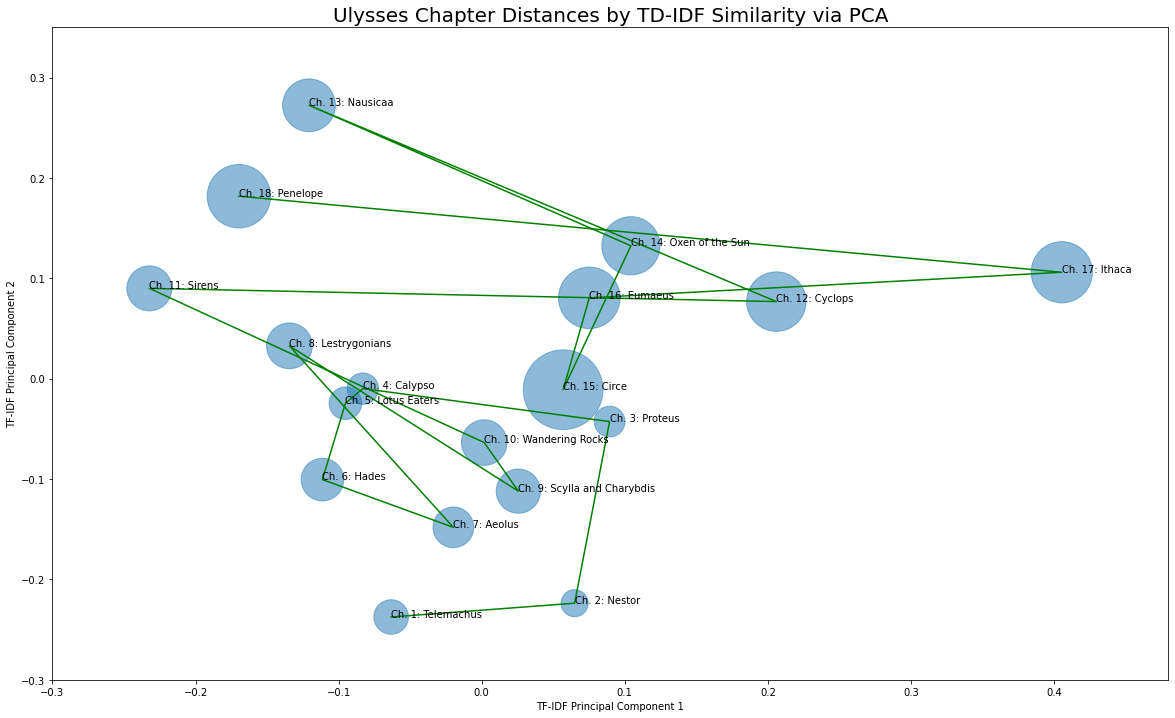

In [120]:
plt.figure(figsize=(20,12))
plt.scatter(df.x, df.y, alpha=.5, s=df.s)
plt.plot(df.x, df.y, c='green')

plt.xlim(-.3,.48)
plt.ylim(-.3,.35)

for i, txt in enumerate(df.name):
    plt.annotate(txt, (df.x[i], df.y[i]))
    
plt.xlabel('TF-IDF Principal Component 1')
plt.ylabel('TF-IDF Principal Component 2')

plt.title('Ulysses Chapter Distances by TD-IDF Similarity via PCA', fontsize=20)
    
    
plt.show()

# Sentiment analyzer code (unfinished)

In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [80]:
analyser = SentimentIntensityAnalyzer()

In [81]:
chap1sent = []
sentence = []
n = 1
for i in ulysses[1].split('.'):
    chap1sent.append(analyser.polarity_scores(i)['compound'])
    sentence.append(n)
    n += 1

In [82]:
N = 10
cumsum, moving_aves = [0], []

for i, x in enumerate(chap1sent, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

In [83]:
def sentiment_timeliner(chapter, window):
    
    sent_values = []
    if chapter <= 17:
        all_chapter_sentences = ulysses[chapter].split('.')
    else:
        tokens = ulysses[chapter].split(' ')
        all_chapter_sentences = [' '.join(tokens[i:i+10]) for i in range(0, len(tokens), 10)] 
    for i in all_chapter_sentences:
        sent_values.append(analyser.polarity_scores(i)['compound'])

        
    N = window
    cumsum, moving_aves = [0], []
    for i, x in enumerate(sent_values, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
            
    x_axis = list(range(len(moving_aves)))
    
    return x_axis, moving_aves, all_chapter_sentences
    

<IPython.core.display.Javascript object>

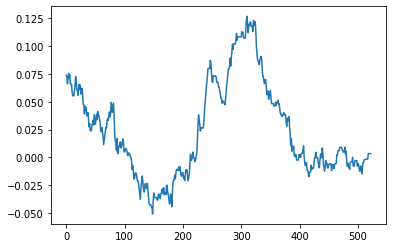

<IPython.core.display.Javascript object>

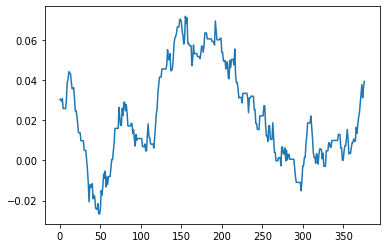

<IPython.core.display.Javascript object>

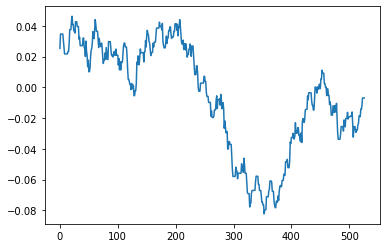

<IPython.core.display.Javascript object>

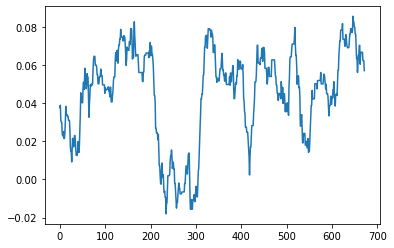

<IPython.core.display.Javascript object>

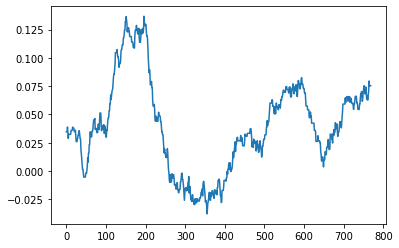

<IPython.core.display.Javascript object>

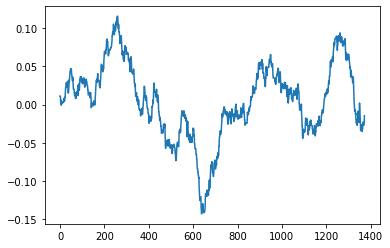

<IPython.core.display.Javascript object>

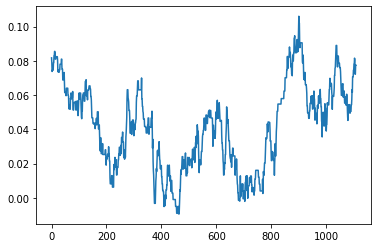

<IPython.core.display.Javascript object>

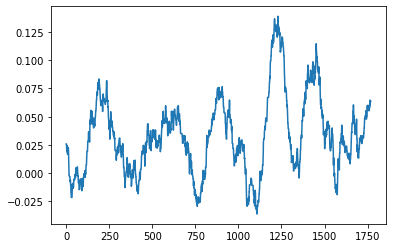

<IPython.core.display.Javascript object>

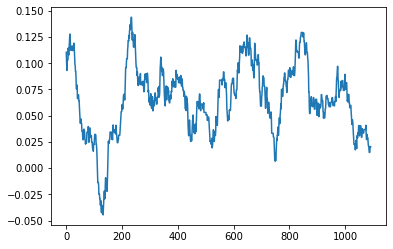

<IPython.core.display.Javascript object>

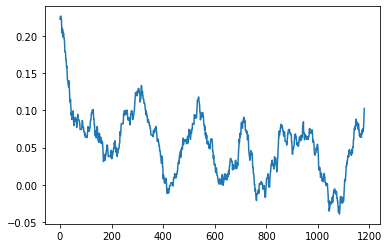

<IPython.core.display.Javascript object>

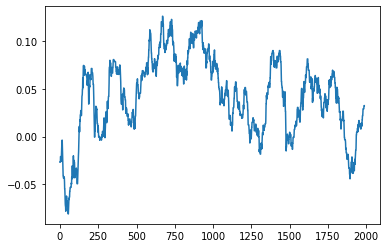

<IPython.core.display.Javascript object>

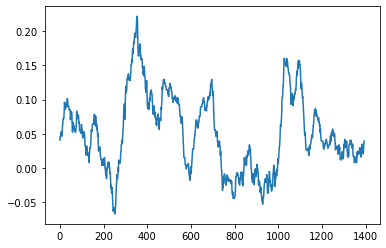

<IPython.core.display.Javascript object>

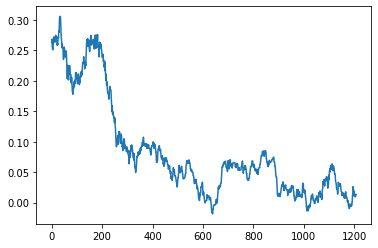

<IPython.core.display.Javascript object>

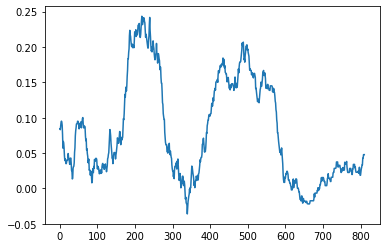

<IPython.core.display.Javascript object>

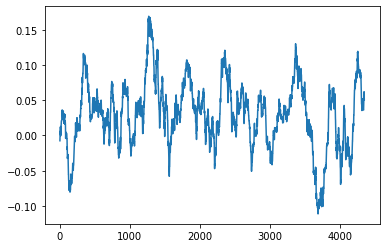

<IPython.core.display.Javascript object>

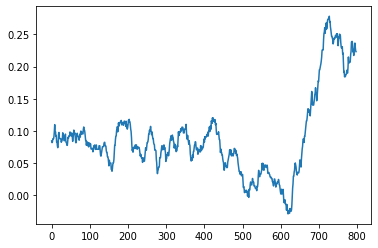

<IPython.core.display.Javascript object>

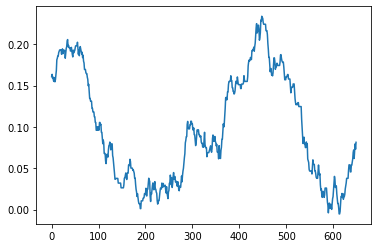

<IPython.core.display.Javascript object>

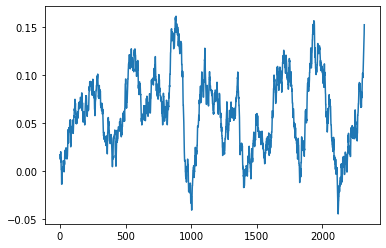

In [84]:
all_x = []
all_y = []
all_sentences = []

for i in range(1,19):
    x, y, z = sentiment_timeliner(i, 100)
    all_x.extend(x)
    all_y.extend(y)
    all_sentences.extend(z)
    sns.lineplot(x, y)
    plt.show()